# Oscillating Circuit Analysis
## Solving ODE with Open-Modelica and variable parameters
### Set Variable Parameters with Python

In [1]:
from OMPython import ModelicaSystem
import matplotlib.pyplot as plt

In [2]:
RESISTOR    =   20      # Ohm
COIL        =   9e-3    # H
CAPACITOR   =   1000e-6 # F

In [3]:
modelname = "blockdiagram"
model = ModelicaSystem(modelname+".mo", modelname)

# model.setSimulationOptions('stopTime=2.0')
# model.setParameters('resistor1.R='+str(RESISTOR))
# model.setParameters('inductor1.L='+str(COIL))
# model.setParameters('capacitor1.C='+str(CAPACITOR))

model.simulate()

Notification: Automatically loaded package Complex 4.0.0 due to uses annotation from Modelica.
Notification: Automatically loaded package ModelicaServices 4.0.0 due to uses annotation from Modelica.
Notification: Automatically loaded package Modelica 4.0.0 due to usage.
[C:/Users/janho/AppData/Roaming/.openmodelica/libraries/Modelica 4.0.0+maint.om/Electrical/Analog/Sources/SineVoltage.mo:5:3-5:61:writable] Warning: Parameter sineVoltage1.f has no value, and is fixed during initialization (fixed=true), using available start value (start=1.0) as default value.



In [4]:
[output_voltage] = model.getSolutions("inductor1.v")
[output_current] = model.getSolutions("capacitor1.i")
[input_voltage] = model.getSolutions("sineVoltage1.v")
[input_current] = model.getSolutions("sineVoltage1.i")
[time] = model.getSolutions('time')

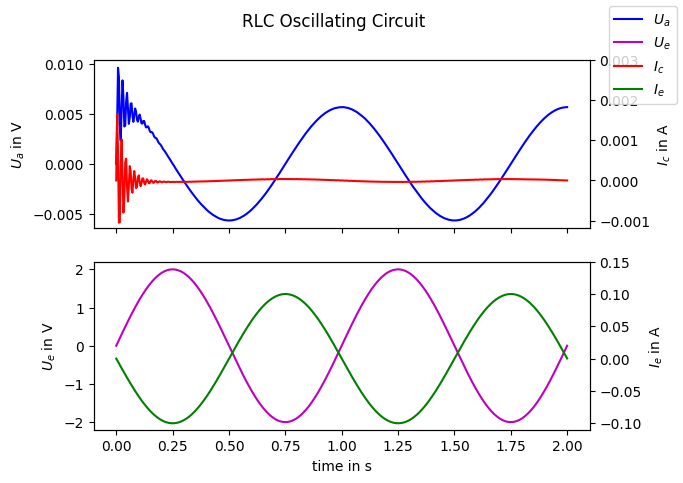

C:\Users\janho\AppData\Local\Temp\ipykernel_9500\3798481824.py:26: RuntimeWarning: invalid value encountered in divide
  plt.plot(time, output_voltage / input_voltage)


(-0.15, 0.15)

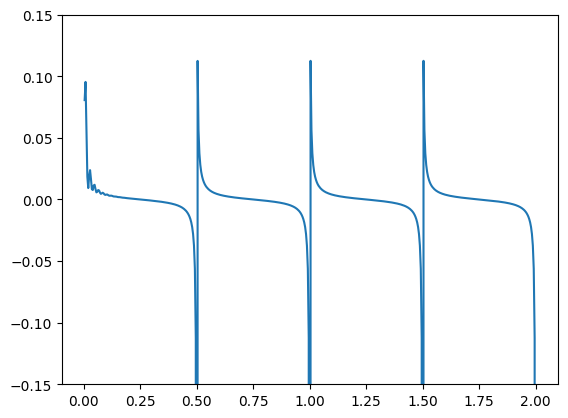

In [6]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("RLC Oscillating Circuit")


ax1.plot(time, output_voltage, label="$U_a$", color="b")
ax1.set_ylabel("$U_a$ in V")
ax12 = ax1.twinx()
ax12.plot(time, output_current, label="$I_c$", color="r")
ax12.set_ylim(top=0.003)
ax12.set_ylabel("$I_c$ in A")


ax2.plot(time, input_voltage, label="$U_e$", color ="m")
ax2.set_ylabel("$U_e$ in V")
ax22 = ax2.twinx()
ax22.plot(time, input_current, label="$I_e$", color="g")
ax22.set_ylim(top=0.15)
ax22.set_ylabel("$I_e$ in A")

ax2.set_xlabel("time in s")
fig.legend()
plt.show()


AXIS_LIMIT=0.15
plt.plot(time, output_voltage / input_voltage)
plt.ylim(bottom=-AXIS_LIMIT, top=AXIS_LIMIT)

# Explanation

Für kleine $t$ zeigt sich das Resonanzverhalten des Schwingkreises. Es ist die abklingende Resonanzfrequenz $f=\frac{1}{2 \pi} \sqrt{CL} = 47,75 mHz$ zu erkennen.